<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Μέρος 1 - Λογιστική Παλινδρόμηση

## Ερώτημα 1

Load Data into DataFrame

In [311]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [312]:
df.describe().drop(['count','25%','50%','75%'],axis=0).drop(['Outcome'],axis=1).round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


Create histograms for each variable

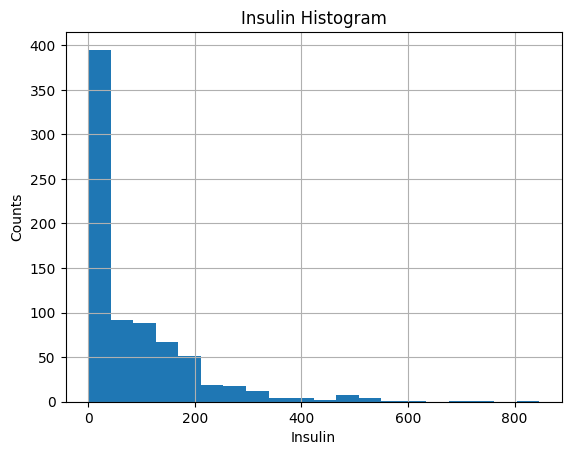

In [313]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

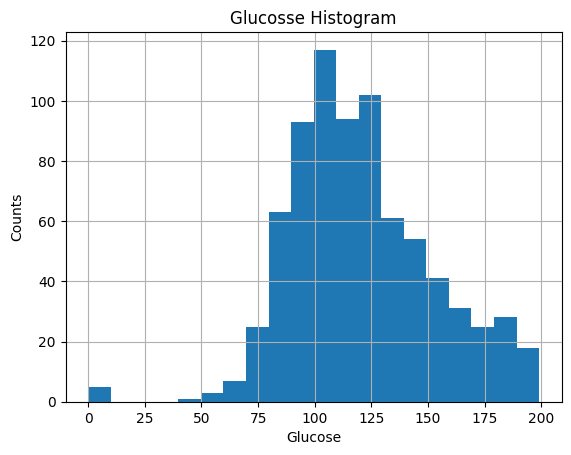

In [314]:
df['Glucose'].hist(bins=20)
plt.title('Glucosse Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

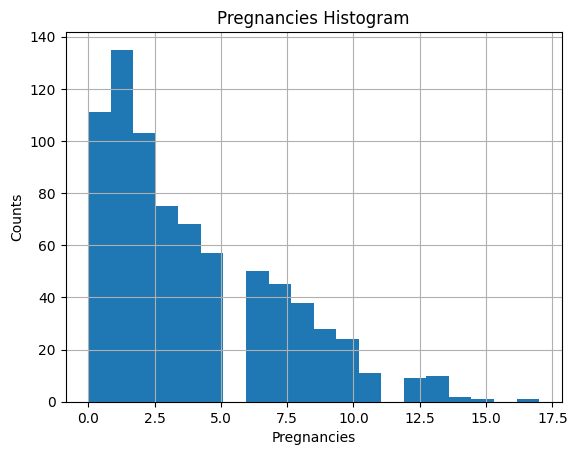

In [315]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

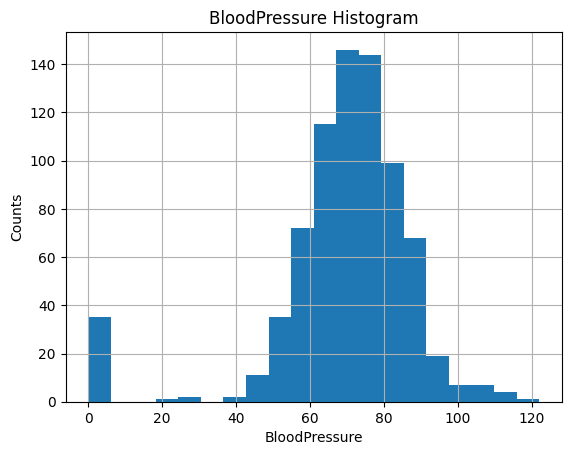

In [316]:
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

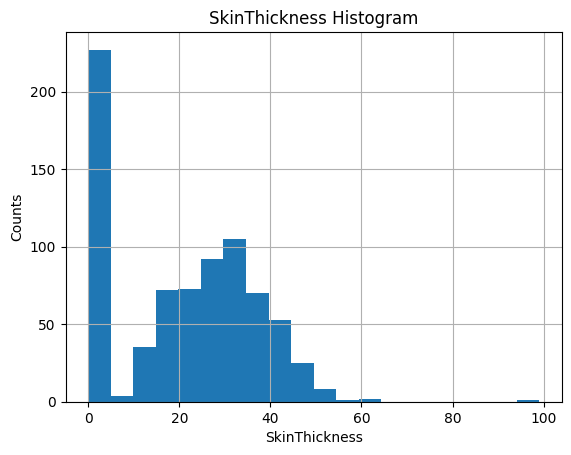

In [317]:
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

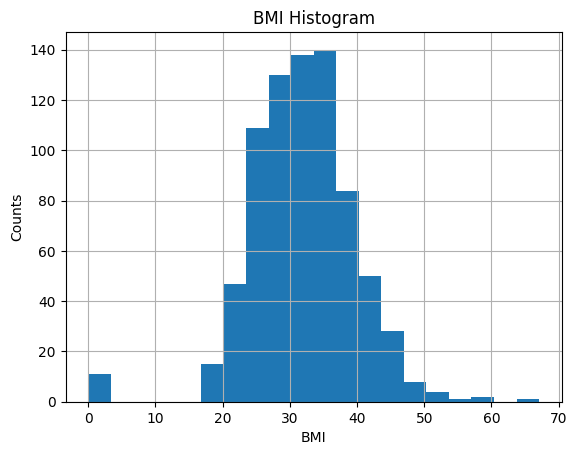

In [318]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

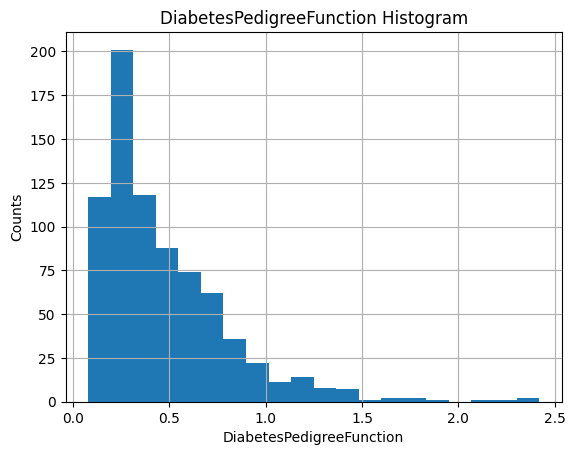

In [319]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

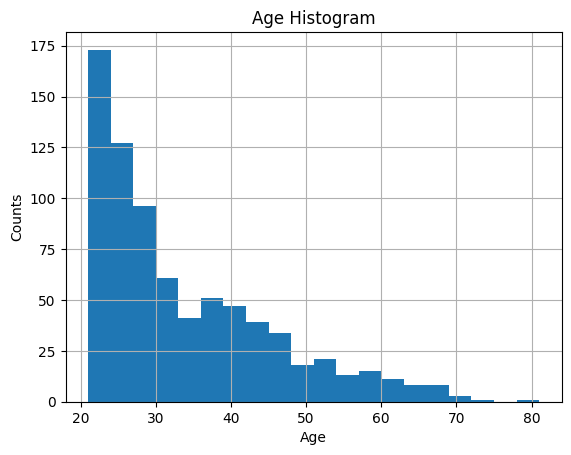

In [320]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

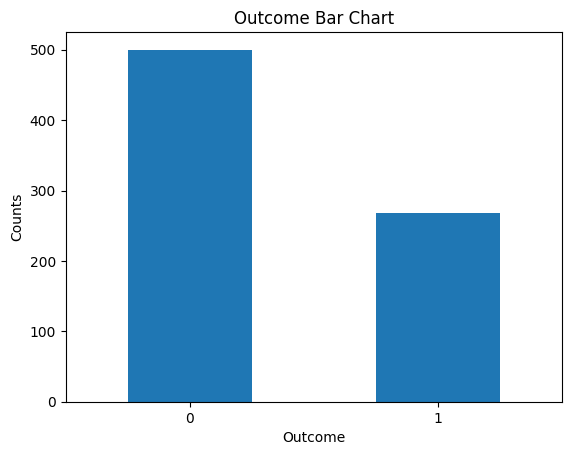

In [321]:
df['Outcome'].value_counts().plot(kind='bar',rot=0)
plt.title('Outcome Bar Chart')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

## Ερώτημα 2

Τα δεδομένα που μας παρέχονται χαρακτηρίονται από καλή ποιότητα. Αρχικά, δεν υπάρχουν κενές τιμές. Επιπλέον, τα περισσότερα δεδομένα φαίνεται να είναι αντιπροσωπευτικά, καθώς δεν υπάρχουν παράλογα υψηλές ή χαμηλές τιμές και οι μέσοι όροι των τιμών των διάφορων δεδομένων είναι κοντά στους πραγματικούς. Οι μέσοι όροι μεταβλητών όπως το BMI και το πάχος δέρματος στους τρικεφάλους είναι λίγο υψηλότερα από τον γενικό μέσο όρο του πληθυσμού, το οποίο είναι λογικό αν λάβουμε υπόψη ότι το set περιλαμβάνει σκόπιμα πολλά άτομα με διαβήτη ώστε να μπορεί να εκπαιδευτεί το ζητούμενο μοντέλο πρόβλεψης.   

## Ερώτημα 3

Η μεταβλητή Age εμφανίζει ασσύμετρη κατανομή, καθώς ο μέσος όρος είναι μεγαλύτερος από την τιμή με την μεγαλύτερη συχνότητα (21 έτη). Ο μέσος όρος αυτός είναι μικρότερος από τον συνηθισμένο, γεγονός που υποδηλώνει ένα bias στα δεδομένα προς ασθενείς μικρότερων ηλικιών. Αυτό ίσως να αλλοιώσει τα αποτελέσματα, αφού το δείγμα δεν είναι αντιπροσωπευτικό του πραγματικού πληθυσμού. Ωστόσο, μιας και δεν έχουμε περιορίσει την πρόβλεψη σε ένα μόνο τύπο διαβήτη και γνωρίζοντας ότι ο διαβήτητης τύπου 1 επηρεάζει κυρίως άτομα νεαρής ηλικίας, μπορεί η απόκλιση αυτή να μην έχει τόσο ισχυρό αντίκτυπο.

## Ερώτημα 4

In [322]:
print('Average glucose level of patients with diabetes:')
print(df[df['Outcome'] == 1]['Glucose'].mean().round(2))
print('Average glucose level of patients without diabetes:')
print(df[df['Outcome'] == 0]['Glucose'].mean().round(2))

Average glucose level of patients with diabetes:
141.26
Average glucose level of patients without diabetes:
109.98


Από τα παραπάνω αποτελέσματα είναι εμφανές ότι πράγματι οι ασθενείς με διαβήτη τείνουν να έχουν υψηλότερα επίπεδα γλυκόζης. Η μέση τιμή της γλυκόζης για τους ασθενείς με διαβήτη (141.26) είναι μεγαλύτερη από τον μέσο όρο γλυκόζης του συνόλου των ασθενών (120.89), ενώ συμβαίνει το αντίθετο με την μέση τιμή γλυκόζης των ασθενών χωρίς διαβήτη (109.98).

## Ερώτημα 5

Create Numpy Arrays

In [323]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

Split between train and test data

In [324]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

## Ερώτημα 6

Train model

In [325]:
log_reg = LogisticRegression(max_iter=1000, random_state=seed)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Results

In [326]:
y_pred = log_reg.predict(x_test)
y_pred_train = log_reg.predict(x_train)
y_pred


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [327]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train = round(accuracy_train*100, 2)

print(f'The accuracy of the model for the test data is: {accuracy_percentage}')
print(f'The accuracy of the model for the training data is: {accuracy_percentage_train}')

The accuracy of the model for the test data is: 77.92
The accuracy of the model for the training data is: 76.54


Από τα παραπάνω βλέπουμε ότι το accuracy του μοντέλου στα δεδομένα του test set είναι πρακτικά η ίδια με εκείνη του train test. Επομένως, το μοντέλο προβλέπει το ίδιο ικανοποιητικά και τα άγνωστα δεδομένα και άρα δεν υπάρχει overfitting.

## Ερώτημα 7

### Accuracy for ages from 0-25

In [328]:
mask_25 = x_test[:, 7] <= 25

x_test_25 = x_test[mask_25]
y_test_25 = y_test[mask_25]
y_pred_25 = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage_25 = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage_25}')

The accuracy of the model is: 77.92


### Accuracy for ages 25 to 50

In [329]:
mask_25to50 = (x_test[:, 7] >= 25) & (x_test[:, 7] <= 50)

x_test_25to50 = x_test[mask_25to50]
y_test_25to50 = y_test[mask_25to50]
y_pred_25to50 = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage_25to50 = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage_25to50}')

The accuracy of the model is: 77.92


### Accuracy for ages from 50 and beyond

In [330]:
mask_50 = x_test[:, 7] >= 50

x_test_50 = x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage_50 = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage_50}')

The accuracy of the model is: 77.92


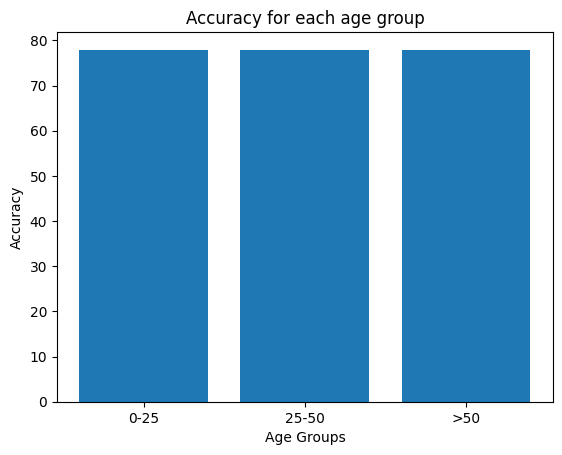

In [331]:
accuracy_percentages = [accuracy_percentage_25,accuracy_percentage_25to50,accuracy_percentage_50]
plt.bar(['0-25','25-50','>50'],accuracy_percentages)
plt.title('Accuracy for each age group')
plt.xlabel('Age Groups')
plt.ylabel('Accuracy')
plt.show()

Από τα αποτελέσματα παρατηρούμε ότι η ακρίβεια του μοντέλου είναι ακριβώς η ίδια για όλες τις ηλικιακές ομάδες. Αυτό πιθανώς να οφείλεται σε μικρή επίδραση της ηλικίας στο τελικό Outcome σε σχέση με άλλες μεταβλητές.

## Ερώτημα 8

In [332]:
recall= recall_score(y_test, y_pred)
recall_percentage = round(recall*100, 2)
print(f'The recall of the model is: {recall_percentage}')

The recall of the model is: 52.7


In [333]:
precision= precision_score(y_test, y_pred)
precision_percentage = round(precision*100, 2)
print(f'The precision of the model is: {precision_percentage}')

The precision of the model is: 70.91


Το recall μας δείχνει το ποσοστό των ατόμων που έχουν διαβήτη που κατάφερε να εντοπίσει το μοντέλο (και κατ' επέκταση το ποσοστό των false negatives), ενώ το precision, το ποσοστό των false positives. Παρατηρούμε ότι το μοντέλο ουσιατικά έχει πιθανότητα λίγο πάνω από 50% να εντοπίσει σωστά ότι κάποιος πάσχων έχει διαβήτη, ενώ έχει πιθανότητα σχεδόν 30% να καταλήξει ότι πάσχει από διαβήτη κάποιος που στην πραγματικότητα δεν έχει διαβήτη. Στην διάγνωση μιας ασθένειας είναι χειρότερο το μοντέλο να προβλέπει ότι κάποιος δεν έχει διαβήτη ενώ έχει, καθώς τίθεται σε κίνδυνο η ζωή του ασθενή, το οποίο συμβαίνει στην συγκεκριμένη περίπτωση. Επομένως, αν δεν υποστεί κάποια επιπλέον ρύθμιση, το μοντέλο δεν είναι ικανοποιητικό. Αυτό πιθανώς να οφείλεται στο γεγονός ότι οι διαβητικοί είναι λιγότεροι από τους μη διαβητικούς στο δείγμα δεδομένων και επομένως το μοντέλο μαθαίνει καλύτερα να προβλέπει ποιός δεν έχει διαβήτη από το ποιός έχει. Θα μπορούσαμε να αυξήσουμε το train size ώστε το μοντέλο να εκπαιδευτεί σε περισσότερα δεδομένα ή να αναγκάσουμε το μοντέλο να δείνει μεγαλύτερη βαρύτητα στην κλάση των διαβητικών (class_weight='balanced').

## Ερώτημα 9

In [334]:
accuracies_test=[]
accuracies_train=[]

for seed in range(10):
  test_size = 0.3

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  x_train.shape, y_train.shape, x_test.shape, y_test.shape

  log_reg = LogisticRegression(max_iter=1000, random_state=seed)
  log_reg.fit(x_train, y_train)

  y_pred = log_reg.predict(x_test)
  y_pred_train = log_reg.predict(x_train)
  y_pred

  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train = round(accuracy_train*100, 2)

  accuracies_test.append(accuracy_percentage)
  accuracies_train.append(accuracy_percentage_train)

print(f'The accuracies of the model for the test data for each loop is: {accuracies_test}')
print(f'The mean accuracy of the model for the test data is: {np.mean(accuracies_test):.2f}')
print(f'The std of the accuracy of the model for the test data is: {np.std(accuracies_test):.2f}\n')
print(f'The accuracies of the model for the training data for each loop is:  {accuracies_train}')
print(f'The mean accuracy of the model for the training data is: {np.mean(accuracies_train):.2f}')
print(f'The std of the accuracy of the model for the training data is: {np.std(accuracies_train):.2f}')

The accuracies of the model for the test data for each loop is: [77.92, 78.35, 74.89, 75.32, 80.95, 78.35, 76.62, 77.92, 77.92, 74.46]
The mean accuracy of the model for the test data is: 77.27
The std of the accuracy of the model for the test data is: 1.87

The accuracies of the model for the training data for each loop is:  [76.54, 77.28, 78.58, 78.77, 75.98, 76.35, 76.91, 78.21, 77.84, 80.07]
The mean accuracy of the model for the training data is: 77.65
The std of the accuracy of the model for the training data is: 1.21


Βλέπουμε ότι η τυπική απόκλιση είναι μικρή, γεγονός που μας δείχνει ότι το μοντέλο παρουσιάζει σταθερότητα παρά την τυχαία κάθε φορά διάκριση των δεδομένων σε train και test. Επιπλέον, οι μέσοι όροι για τα accuracies μεταξύ test και training data είναι πολύ κοντά, επομένως το μοντέλο δεν κινδυνεύει να κάνει overfitting για οποιοδήποτε seed.

## Ερώτημα 10

Normalize data

In [335]:
x_norm = (x-x.min())/(x.max()-x.min())
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [336]:
log_reg_norm = LogisticRegression(max_iter=1000, random_state=seed)
log_reg_norm.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

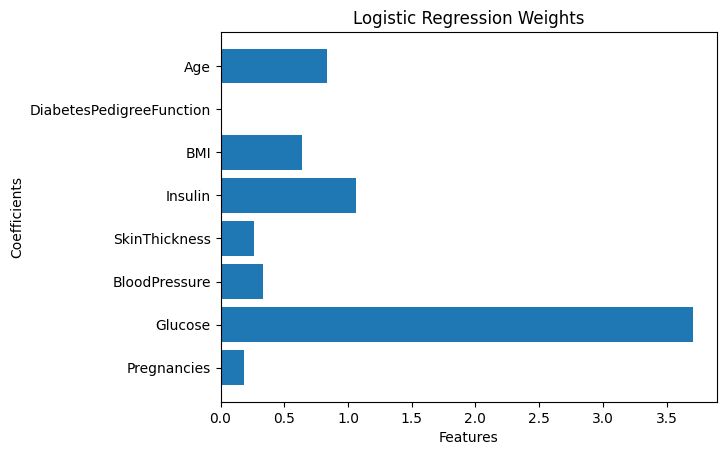

In [337]:
coeffs = log_reg_norm.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Από το διάγραμμα βλέπουμε ότι οι τρεις πιο σημαντικοί παράγοντες είναι τα επίπεδα της γλυκόζης, τα επίπεδα της ινσουλίνης και η ηλικία, καθώς εμφανίζουν τους μεγαλύτερους συντελεστές. Το αποτέλεσμα είναι λογικό, αφού στην πραγματικότητα το αν ένα άτομο έχει διαβήτη ή όχι ορίζεται από τα επίπεδα γλυκόζης στο αίμα του, ενώ η αιτία που προκαλεί τον διαβήτη είναι η έλλειψη ινσουλίνης στον οργανισμό.

# Μέρος 2 - Γραμμική Παλινδρόμηση

## Ερώτημα 1

In [338]:
df = pd.read_csv('diabetes.csv')
inputs_df = df[['Pregnancies','BloodPressure', 'BMI','Age']]
target_df = df['Glucose']

xi = inputs_df.to_numpy()
yi = target_df.to_numpy()
xi.shape, yi.shape

((768, 4), (768,))

In [339]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(xi, yi, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

## Ερώτημα 2

In [340]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [341]:
y_pred = lin_reg.predict(x_test)

In [342]:
mae = mean_absolute_error(y_test,y_pred)
print(f'The Mean Absolute Error of the model is: {mae}')

The Mean Absolute Error of the model is: 23.599990462075155


Η καταλληλότερη μετρική στην συγκεκριμένη περίπτωση είναι το MAE, αφού είναι λιγότερο ευαίσθητο σε ακραία σφάλματα, το οποίο είναι θεμιτό στην συγκεκριμένη περίπτωση, καθώς μας δίνει καλύτερη εικόνα για την αποτελεσματικότητα του μοντέλου.

## Ερώτημα 3

In [343]:
MAE_test_Lasso=[]
for alpha in np.arange(0.2,1.2,0.2):
  lasso_reg = linear_model.Lasso(alpha=alpha)
  lasso_reg.fit(x_train, y_train)

  y_pred = lasso_reg.predict(x_test)

  MAE = mean_absolute_error(y_test, y_pred)

  MAE_test_Lasso.append(MAE)

print(f'The MAE of the model for the test data for each loop is: {MAE_test_Lasso}')

The MAE of the model for the test data for each loop is: [23.594203291229192, 23.58841532130485, 23.582629340037467, 23.576843358770088, 23.571057628091296]


Από το πινακάκι φαίνεται ότι το MAE είναι πρακτικά αμετάβλητο με αλλαγή της παραμέτρου alpha.

## Ερώτημα 4

In [344]:
xi_norm = (xi-xi.min())/(xi.max()-xi.min())
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(xi_norm, yi, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

In [345]:
lin_reg_norm = LinearRegression()
lin_reg_norm.fit(x_train, y_train)

LinearRegression()

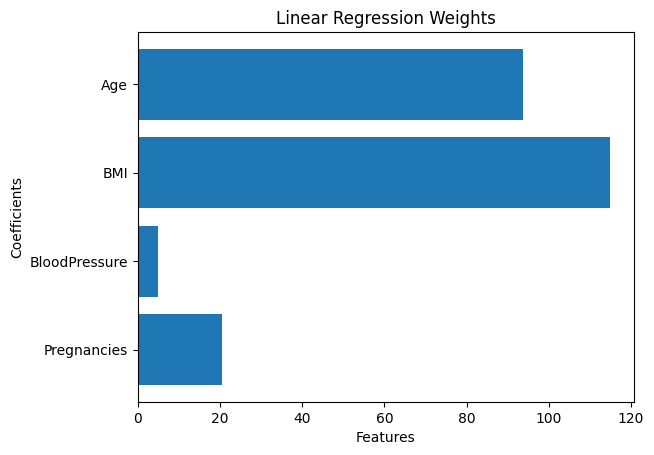

In [346]:
coeffs_lin = lin_reg_norm.coef_
importance_weights_lin = np.abs(coeffs_lin)
plt.barh(inputs_df.columns, importance_weights_lin)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Το BloodPressure έχει τον μικρότερο συντελεστή.

In [347]:
inputs_new = inputs_df.drop(columns=['BloodPressure'])

xi_new = inputs_new.to_numpy()

xi_new.shape, yi.shape

((768, 3), (768,))

In [348]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(xi_new, yi, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 3), (537,), (231, 3), (231,))

In [349]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [350]:
y_pred = lin_reg.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
print(f'The Mean Absolute Error of the model is: {mae}')

The Mean Absolute Error of the model is: 23.615563643141343


Από τα παραπάνω βλέπουμε ότι το MAE αυξάνεται ανεπαίσθητα αφαιρώντας το Blood Pressure από τα δεδομένα, το οποίο είναι λογικό καθώς έχει πολύ μικρό συντελεστή βαρύτητας σε σχέση με τις υπόλοιπες μεταβλητές.